# Problem Statement

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

Dataset: https://www.kaggle.com/uciml/iris

In [1]:
# Importing the Libraries

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns

In [2]:
# Importing the Dataframe

df = pd.read_csv('Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Get the Descriptive Statistics of the Data

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Check for Missing Values by Info Method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


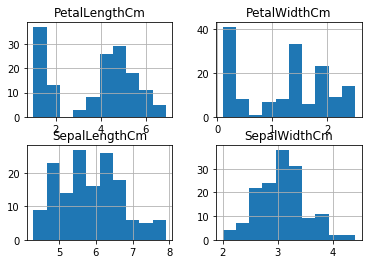

In [5]:
# Plot a Histogram

df.hist(bins=10);

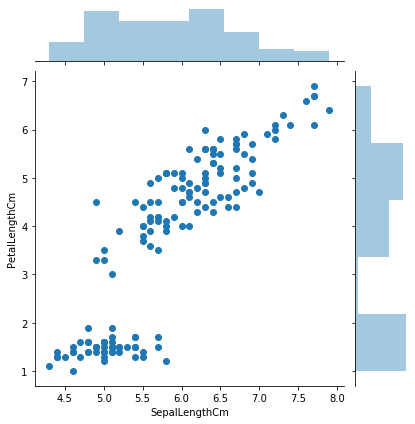

In [6]:
# Get a Jointplot

sns.jointplot(x= 'SepalLengthCm', y= 'PetalLengthCm', data= df);

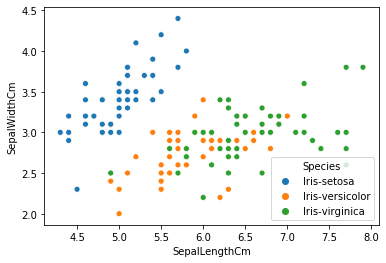

In [7]:
# Use Scatter plot to get the Visual

sns.scatterplot( x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df)

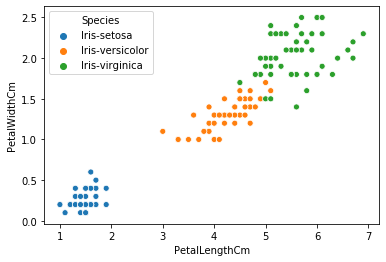

In [8]:
sns.scatterplot( x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df);

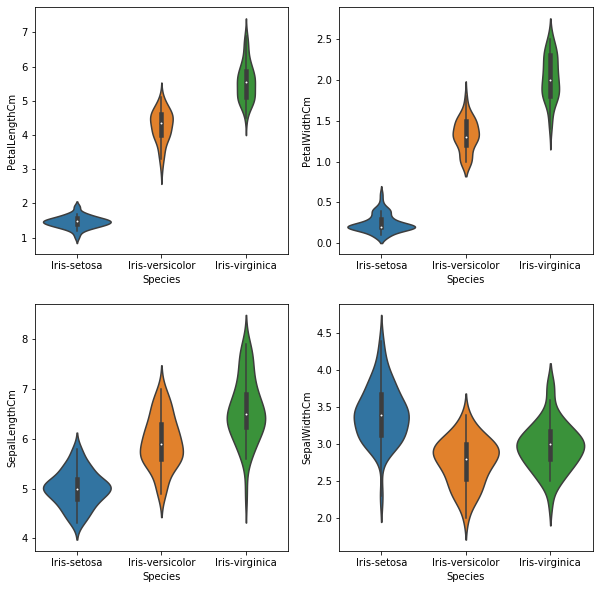

In [11]:
# Let's show the Violin plot 

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df);

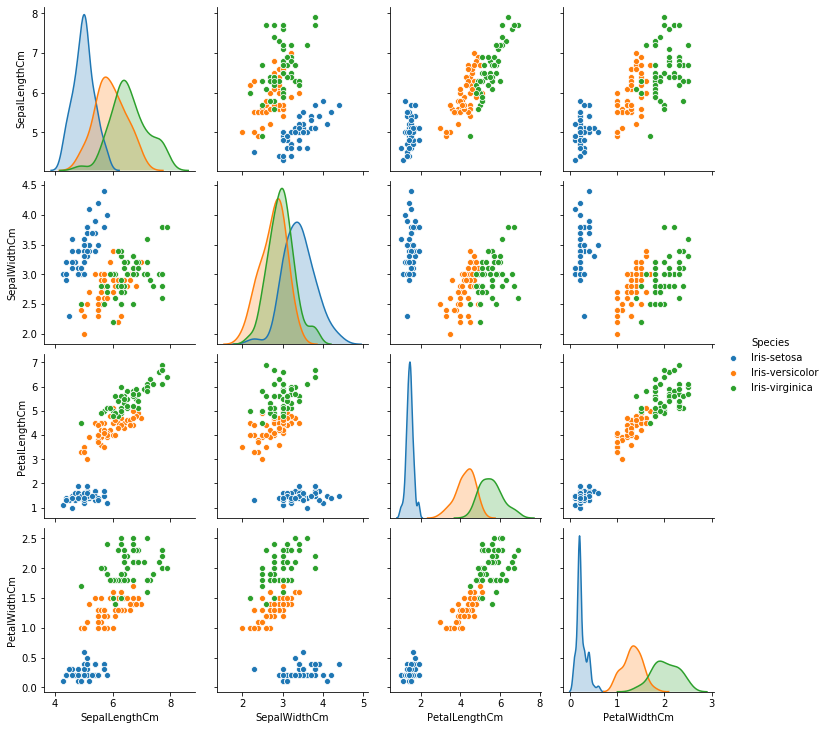

In [9]:
# Plot a Pairplot

sns.pairplot(df, hue= 'Species');

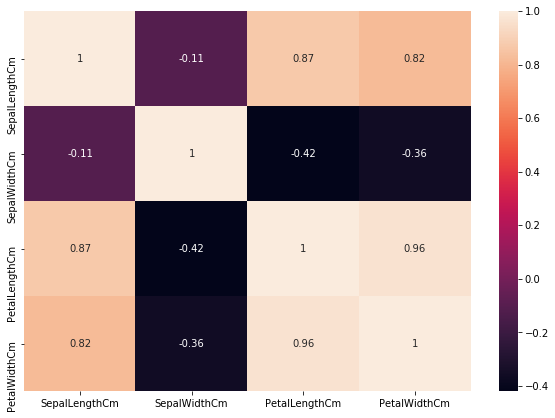

In [13]:
# Plot a Heatmap for the Correlation between Variables

plt.figure(figsize=(10,7)) 
sns.heatmap(df.corr(),annot=True) ;

In [14]:
# Create Independent and Dependent Variables

X = df.drop(['Species'], axis= 1)
y = df['Species']

In [25]:
# We are Not doing Label Encoding for Y Values

# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4) # See the Test Size

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.96      0.96      0.96        25
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



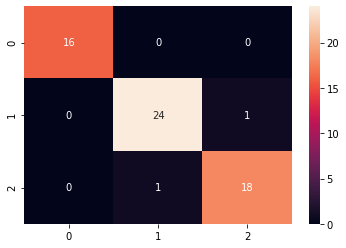

In [26]:
# Training the KNN Model

# Importing the Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predict the Test set
y_predict = classifier.predict(X_test)

# Metrics Calculation
cm = confusion_matrix(y_test, y_predict)

# print Classification Report

print(classification_report(y_test, y_predict))

sns.heatmap(cm, annot=True, fmt="d");